# User Engagement 

#### Retrieve data from PostgreSQL local database

In [1]:
import pandas as pd
import numpy as np
import psycopg2 as pg2
import matplotlib.pyplot as plt
import os

# keep matplotlib interactive
%matplotlib notebook
# %matplotlib inline
# use ggplot style
plt.style.use('ggplot')

In [2]:
# query
query_tot_agg = '''
                SELECT date, COUNT(*) AS active_users, SUM(total_secs) AS tot_secs_allusers
                FROM Activity
                GROUP BY date
                ORDER BY date
                '''

In [3]:
# connect to database and retrieve aggregation
# Takes only 2 minutes instead of 8 minutes using Pandas
with pg2.connect(dbname = 'kkbox', user='postgres', password = 'Hallmark') as conn:
    df_tot_secs = pd.read_sql_query(query_tot_agg, conn, index_col=['date'], parse_dates=['date'])

#### Aggregated user's listening time

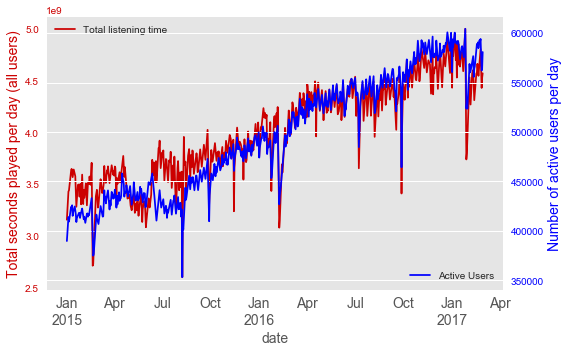

In [37]:
figact , axact = plt.subplots(figsize = (8, 5))

dark_red = (0.8, 0, 0)
df_tot_secs['tot_secs_allusers'].plot(ax = axact, color = dark_red )
axact.set_ylabel('Total seconds played per day (all users)', color = dark_red, fontsize = 14)
axact.tick_params(axis = 'y', colors = dark_red)
axact.grid(b=None)

axaccact = axact.twinx()
df_tot_secs['active_users'].plot(ax = axaccact, color = 'b')
axaccact.set_ylabel('Number of active users per day', color='b', fontsize = 14)
axaccact.tick_params(axis = 'y', colors = 'b')

# legends
axact.legend(['Total listening time'])
axaccact.legend(['Active Users'], loc=4)
axact.xaxis.label.set_fontsize(14)
axact.tick_params(axis = 'x', labelsize=14)

# TODO: remove y axis and y labels, grids too
# add title "Listening time and active users correlates well"
# "Drop in engagement occurs during Holidays"

plt.tight_layout()
figact.savefig(os.path.join(os.pardir, 'reports', 'figures', 'Users_Activity_TotalTime.png'), transparent=True)

# National Holidays

In [5]:
# look at holidays (data scraped from website)
holidays_path = os.path.join(os.pardir, 'data', 'external', 'holidays_taiwan.csv')
df_holidays = pd.read_csv(holidays_path, index_col='month_day', parse_dates=['month_day'])

In [6]:
# merge existing data and holidays on date index and "left join style"
df_comb = pd.merge(df_tot_secs, df_holidays, how='left',left_index=True, right_index=True)

In [7]:
# create new column to give holidays a value (sum) for plotting purpose
df_comb['holiday'] = df_comb.tot_secs_allusers.values
df_comb.loc[df_comb.name.isnull(), 'holiday'] = np.nan

In [8]:
df_comb.head()

,active_users,tot_secs_allusers,category,name,holiday
2015-01-01,389783,3.155570e+09,National holiday,New Year's Day,3.155570e+09
2015-01-02,400855,3.383950e+09,National holiday,New Year's weekend,3.383950e+09
2015-01-03,407736,3.403490e+09,National holiday,New Year's weekend,3.403490e+09
2015-01-04,413950,3.427960e+09,Working day in weekend,Special Working Day,3.427960e+09
2015-01-05,409413,3.438900e+09,NaN,NaN,NaN


In [9]:
# add holidays to same plot
_ = df_comb['holiday'].plot(ax = axact, linestyle = '', marker = 'o')

In [10]:
# February holidays
df_comb[(df_comb.index.month == 2) & (df_comb.name.notnull())]

,active_users,tot_secs_allusers,category,name,holiday
2015-02-15,420905,3.492490e+09,Working day in weekend,Special Working Day,3.492490e+09
2015-02-18,404413,2.949180e+09,National holiday,Spring Festival Eve,2.949180e+09
2015-02-19,375335,2.711430e+09,National holiday,Chinese New Year,2.711430e+09
2015-02-20,374919,2.729600e+09,National holiday,Spring Festival Golden Week holiday,2.729600e+09
2015-02-21,376640,2.905200e+09,National holiday,Spring Festival Golden Week holiday,2.905200e+09
2015-02-22,385132,2.992960e+09,National holiday,Spring Festival Golden Week holiday,2.992960e+09
2015-02-23,403824,3.135350e+09,National holiday,Spring Festival Golden Week holiday,3.135350e+09
2015-02-24,403583,3.297940e+09,National holiday,Spring Festival Golden Week holiday,3.297940e+09
2015-02-28,408775,3.347900e+09,Working day in weekend,Special Working Day,3.347900e+09
2016-02-07,446666,3.202690e+09,National holiday,Spring Festival Eve,3.202690e+09


* The number of daily active users seems to correlate well with total listening time.

* There are multiple drops occurring in user's count and more so in listening time. Late January drops corresponds to Chinese New Year which lasts 5 days not including new year's eve.<br>
Another periodic drop is on Father's day (always August 8th). Note that in 2015, father's day was on a Saturday while father's day in 2016 was on a Monday. Thus we can see a lesser drop on Sunday, August 7th in 2016<br>
Decline on September 28th, 2015 corresponds to mid-autumn festival. It does repeat in 2016 with lesser effect (September 17th).<br>
The closest event to the large drop on September 27th, 2016 was Teacher's day (birthday of Confucius) that took place on Sep. 28th, 2016.<br>
There is an extended drop in May 2015. It could be due to technical malfunction (music app not working for iphone for instance).